# Multilayer Perceptrons and Neural Networks

The perceptron algorithm is a linear model training method similar to gradient descent. Over the years, linear models have been combined in different architectures, sometimes trained using the perceptron algorithm, and more recently trained with stochastic gradient descent. These are often referred to as Neural Networks, where each linear model, or node, is considered as a neuron in a network.

<img src="figures/mlp.jpg">
Source: O'Reilly

Each of the nodes in the network has a bias $b$ which is added to the output of its activation function. Each connection between nodes has a weight $w$. These model parameters, $b$ and $w$, are what we need to optimize. MLPs/ANNs also have a number of "hyper-parameters", being the number of nodes and layers, the activation functions of the nodes, the connectivity scheme, the learning rate, and more. Larger ANNs with various types of layers are the topic of Deep Learning. This is a well-known architecture for image processing, where each layer is composed of many individual neurons:
<img src="figures/vgg16.png">
In this course, we will not cover deep learning but will look at Multilayer Perceptrons to understand the core functionality.

Let's start by making some sample data that is highly intermixed

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

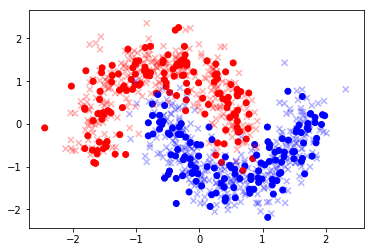

In [2]:
X, y = make_moons(n_samples=900, noise=0.2, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

Y_train_OneHot = np.eye(2)[y_train]
Y_test_OneHot = np.eye(2)[y_test]

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3);

We will first define a classifier with a single node. This is simply a linear classifier! Using SGD, this will do no better than our linear classifiers from before.

In [3]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(1,), solver='sgd', 
                    batch_size=4, learning_rate_init=0.005,
                    max_iter=500, shuffle=True)
# Train the MLP classifier on training dataset
clf.fit(X_train, Y_train_OneHot)
print("Number of layers: ", clf.n_layers_)
print("Number of outputs: ", clf.n_outputs_)


Number of layers:  3
Number of outputs:  2


This network has 2 outputs, meaning the given classification will be whichever output is higher. We can also ask for the probability estimates, which in a multi-class problem might give better understanding of how well we classified things.

In [4]:
print(clf.predict(X_train)[1:5, :])
print(clf.predict_proba(X_train)[1:5, :])

[[0 1]
 [1 0]
 [0 1]
 [0 1]]
[[0.05686167 0.94317894]
 [0.98247423 0.01751452]
 [0.04992074 0.95011652]
 [0.45151025 0.54854374]]


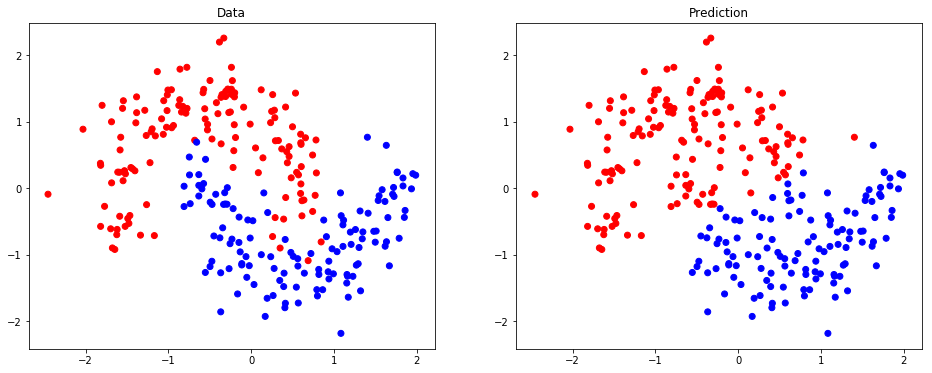

In [5]:
h = np.argmax(clf.predict(X_train), axis=1)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax[0].set_title("Data");
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=h, cmap=cm_bright)
ax[1].set_title("Prediction");

In [6]:
print("Train accuracy: ", clf.score(X_train, Y_train_OneHot), " test accuracy:", clf.score(X_test,Y_test_OneHot))

Train accuracy:  0.8629629629629629  test accuracy: 0.8698412698412699


However, we can change the architecture of our multi-layer perceptron to include more nodes. First, let's increase the size of our single hidden layer.

Train accuracy:  0.9740740740740741  test accuracy: 0.9492063492063492


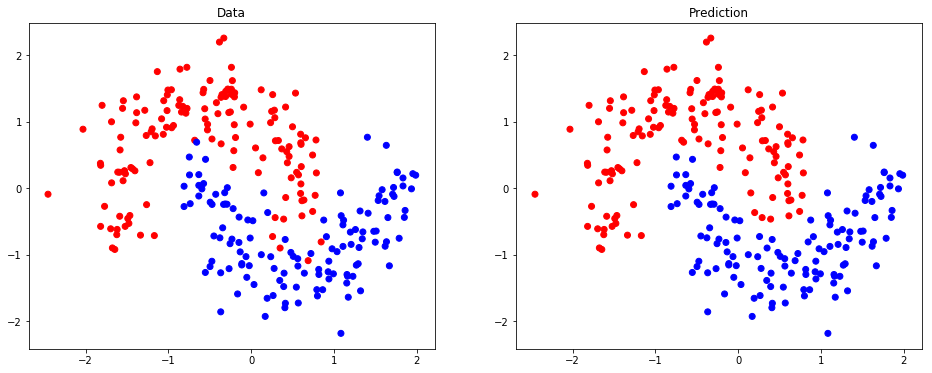

In [7]:
clf = MLPClassifier(hidden_layer_sizes=(10,), solver='sgd', 
                    batch_size=4, learning_rate_init=0.005,
                    max_iter=500, shuffle=True)
clf.fit(X_train, Y_train_OneHot)
h = np.argmax(clf.predict(X_train), axis=1)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax[0].set_title("Data");
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=h, cmap=cm_bright)
ax[1].set_title("Prediction");
print("Train accuracy: ", clf.score(X_train, Y_train_OneHot), " test accuracy:", clf.score(X_test,Y_test_OneHot))

Using backpropagation, we can also add multiple layers to the model.

Number of layers:  4
Number of outputs:  2
Train accuracy:  0.9703703703703703  test accuracy: 0.9507936507936507


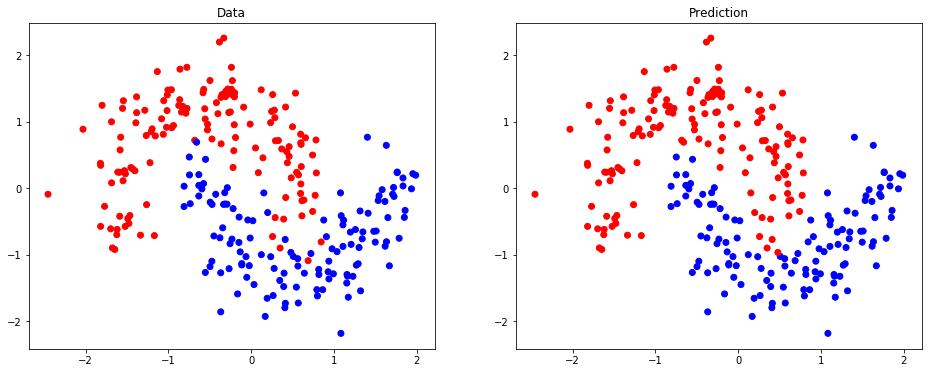

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(10,10), solver='sgd', 
                    batch_size=4, learning_rate_init=0.005,
                    max_iter=500, shuffle=True)
clf.fit(X_train, Y_train_OneHot)
print("Number of layers: ", clf.n_layers_)
print("Number of outputs: ", clf.n_outputs_)
h = np.argmax(clf.predict(X_train), axis=1)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax[0].set_title("Data");
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=h, cmap=cm_bright)
ax[1].set_title("Prediction");
print("Train accuracy: ", clf.score(X_train, Y_train_OneHot), " test accuracy:", clf.score(X_test,Y_test_OneHot))

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Download ``03_mlp_iris.py`` from the course website. We start with a single hidden layer of 4 neurons. Modify the architecture to get a better classification accuracy.
      </li>
    </ul>
</div>

In [9]:
# %load exercises/03_mlp_iris.py